In [2]:
import numpy as np
import pandas as pd

In [20]:
conn=pd.read_csv('/media/maria/DATA1/Documents/Folders/Connectomics/exported-traced-adjacencies/traced-total-connections.csv')

In [21]:
conn=np.array(conn)

In [22]:
print(conn)

[[5813054846 5813020143          1]
 [5813054846 2215550458          1]
 [5813054846 1448575109          1]
 ...
 [ 453794660  455172836          1]
 [ 453794660  388975834          3]
 [ 453794660  767904550          1]]


In [23]:
def conn_mat(conn):
    map_neurons_to_inds={}
    uniq=np.array(list(set(np.union1d(conn[:,0],conn[:,1]))))
    for j in range(0,uniq.shape[0]):
        map_neurons_to_inds[uniq[j]]=j
    #print(map_neurons_to_inds)
    conn_m=np.zeros((uniq.shape[0],uniq.shape[0]))
    for row in range(0,conn.shape[0]):
        pre=map_neurons_to_inds[conn[row,0]]
        post=map_neurons_to_inds[conn[row,1]]
        weight=conn[row,2]
        conn_m[pre,post]=weight
    return conn_m

def conn_mat_undirected(conn):
    map_neurons_to_inds={}
    uniq=np.array(list(set(np.union1d(conn[:,0],conn[:,1]))))
    for j in range(0,uniq.shape[0]):
        map_neurons_to_inds[uniq[j]]=j
    #print(map_neurons_to_inds)
    conn_m=np.zeros((uniq.shape[0],uniq.shape[0]))
    for row in range(0,conn.shape[0]):
        pre=map_neurons_to_inds[conn[row,0]]
        post=map_neurons_to_inds[conn[row,1]]
        weight=conn[row,2]
        conn_m[pre,post]=weight
        conn_m[post,pre]=weight
    return conn_m

In [24]:
conn_undir=conn_mat_undirected(conn)

In [25]:
print(conn_undir)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [32]:
np.save('/media/maria/DATA1/Documents/Folders/Connectomics/conn_undir.npy',conn_undir)

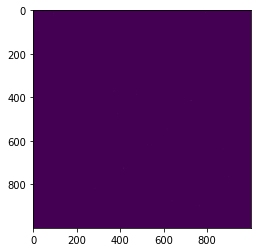

In [41]:
import matplotlib.pyplot as plt
plt.imshow(conn_undir[:100,:1000])

In [43]:
conn_undir[conn_undir>0].shape

(12060,)

In [ ]:
conn_undir[conn_undir]=1

In [35]:
conn_undir=conn_undir[:1000,:1000]

In [36]:
from scipy.optimize import linprog

obj=np.ones((conn_undir.shape[0],))

A_ub=conn_undir
b_ub=np.ones((conn_undir.shape[0],))

bounds=[]

for j in range(0,conn_undir.shape[0]):
    bounds.append((0,1))
    

In [39]:
import time
start=time.time()
opt = linprog(c=obj, A_ub=A_ub, b_ub=b_ub, bounds=bounds)
end=time.time()
print(end-start)

3.5271382331848145


In [40]:
opt

     con: array([], dtype=float64)
     fun: 1.7421851898359778e-10
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 